# Polish Bankruptcy

The dataset is about bankruptcy of Polish companies. We want to predict whether a polish company will bankrupt or not based on given historical data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()  # make plots nicer

## Exploration analysis

At first we loaded data from 5 slighty different datasets. The bankrupcy status is evaluated after different period of time in every dataset. We don't want to lose this information, so new attribute `evaluation_time` (in years) was added to reflect this information.

In [2]:
from scipy.io import arff

# možno zmažeme ten evaluation_time ak to bude úplne useless
data1 = pd.DataFrame(arff.loadarff('1year.arff')[0])
data1["evaluation_time"] = 5
data2 = pd.DataFrame(arff.loadarff('2year.arff')[0])
data2["evaluation_time"] = 4
data3 = pd.DataFrame(arff.loadarff('3year.arff')[0])
data3["evaluation_time"] = 3
data4 = pd.DataFrame(arff.loadarff('4year.arff')[0])
data4["evaluation_time"] = 2
data5 = pd.DataFrame(arff.loadarff('5year.arff')[0])
data5["evaluation_time"] = 1
df = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)
df = df.rename(index=str,columns={"Attr1" :"net profit / total assets","Attr2" :"total liabilities / total assets","Attr3" :"working capital / total assets","Attr4" :"current assets / short-term liabilities","Attr5" :"[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365","Attr6" :"retained earnings / total assets","Attr7" :"EBIT / total assets","Attr8" :"book value of equity / total liabilities","Attr9" :"sales / total assets","Attr10" :"equity / total assets","Attr11" :"(gross profit + extraordinary items + financial expenses) / total assets","Attr12" :"gross profit / short-term liabilities","Attr13" :"(gross profit + depreciation) / sales","Attr14" :"(gross profit + interest) / total assets","Attr15" :"(total liabilities * 365) / (gross profit + depreciation)","Attr16" :"(gross profit + depreciation) / total liabilities","Attr17" :"total assets / total liabilities","Attr18" :"gross profit / total assets","Attr19" :"gross profit / sales","Attr20" :"(inventory * 365) / sales","Attr21" :"sales (n) / sales (n-1)","Attr22" :"profit on operating activities / total assets","Attr23" :"net profit / sales","Attr24" :"gross profit (in 3 years) / total assets","Attr25" :"(equity - share capital) / total assets","Attr26" :"(net profit + depreciation) / total liabilities","Attr27" :"profit on operating activities / financial expenses","Attr28" :"working capital / fixed assets","Attr29" :"logarithm of total assets","Attr30" :"(total liabilities - cash) / sales","Attr31" :"(gross profit + interest) / sales","Attr32" :"(current liabilities * 365) / cost of products sold","Attr33" :"operating expenses / short-term liabilities","Attr34" :"operating expenses / total liabilities","Attr35" :"profit on sales / total assets","Attr36" :"total sales / total assets","Attr37" :"(current assets - inventories) / long-term liabilities","Attr38" :"constant capital / total assets","Attr39" :"profit on sales / sales","Attr40" :"(current assets - inventory - receivables) / short-term liabilities","Attr41" :"total liabilities / ((profit on operating activities + depreciation) * (12/365))","Attr42" :"profit on operating activities / sales","Attr43" :"rotation receivables + inventory turnover in days","Attr44" :"(receivables * 365) / sales","Attr45" :"net profit / inventory","Attr46" :"(current assets - inventory) / short-term liabilities","Attr47" :"(inventory * 365) / cost of products sold","Attr48" :"EBITDA (profit on operating activities - depreciation) / total assets","Attr49" :"EBITDA (profit on operating activities - depreciation) / sales","Attr50" :"current assets / total liabilities","Attr51" :"short-term liabilities / total assets","Attr52" :"(short-term liabilities * 365) / cost of products sold)","Attr53" :"equity / fixed assets","Attr54" :"constant capital / fixed assets","Attr55" :"working capital","Attr56" :"(sales - cost of products sold) / sales","Attr57" :"(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)","Attr58" :"total costs /total sales","Attr59" :"long-term liabilities / equity","Attr60" :"sales / inventory","Attr61" :"sales / receivables","Attr62" :"(short-term liabilities *365) / sales","Attr63" :"sales / short-term liabilities","Attr64" :"sales / fixed assets"})

There are 43405 entries and 64 attributes (plus 1 we added) in dataset. All of our attributes are numbers, except one object which represents information if company bankrupted or not. We can see that most of attributes have missing values. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   net profit / total assets                                                                                            43397 non-null  float64
 1   total liabilities / total assets                                                                                     43397 non-null  float64
 2   working capital / total assets                                                                                       43397 non-null  float64
 3   current assets / short-term liabilities                                                                              43271 non-null  float64
 4   [(cash + short-

Based on histogram of `class` attribute we know that our dataset is not balanced. There is much more companies which didn't go bankrupt.

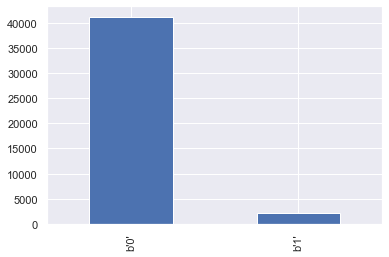

In [4]:
df["class"].value_counts().plot(kind='bar')

Most of values seem to be distributed around zero which is the mean for most attributes. Based on standard deviation and mean almost every minimum and maximum looks like anomaly. 

In [5]:
df.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,evaluation_time
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,3.060247
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,1.283975
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,1.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,2.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,3.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,5.000000


We tried to make histograms to explore data more precisely. Histograms put overwhelming majority of the data in one "bucket", so it was not useful at all. We ploted the data with violinplots also to better see what is happening in the data and therefore we can assume there are some significant outliers in data.

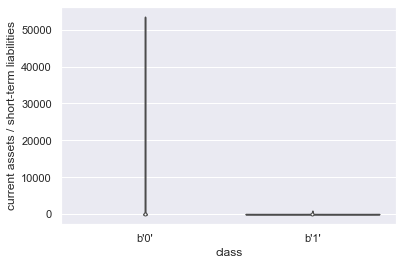

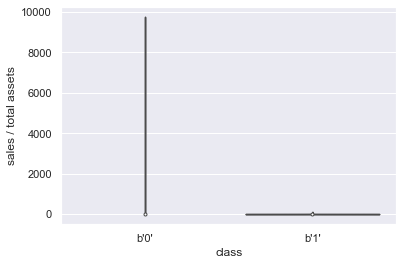

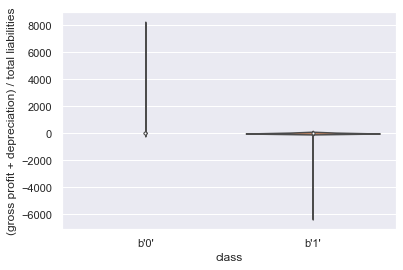

In [6]:
sns.violinplot(y=df["current assets / short-term liabilities"], x=df["class"])
plt.show()
sns.violinplot(y=df["sales / total assets"], x=df["class"])
plt.show()
sns.violinplot(y=df["(gross profit + depreciation) / total liabilities"], x=df["class"])
plt.show()

We used correlation heatmap instead of correlation matrix, because with 64 attributes it was unreadable. Some attributes are highly correlated and because of that we will probably reduce amount of attributes in preprocessing phase.

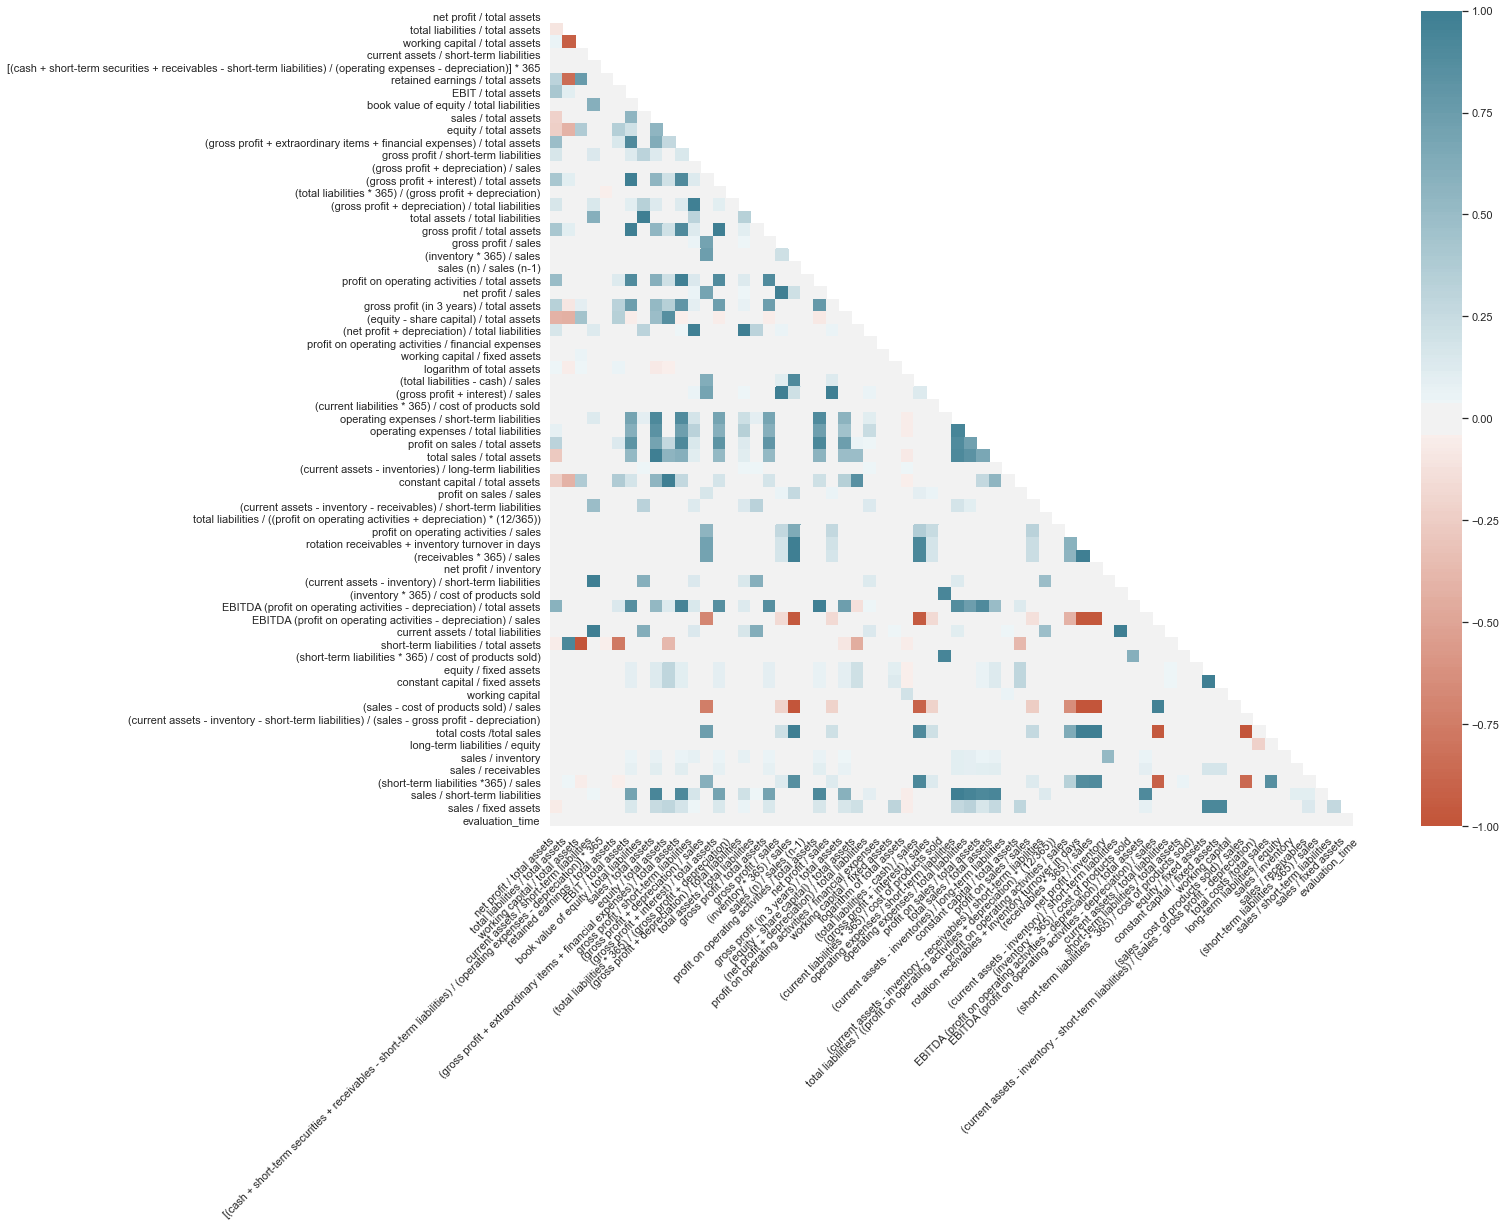

In [7]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.subplots(figsize=(20,15))
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        mask=mask
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

## Preprocessing

`class` column is object. We changed this attribute to categorical type, because most of machine learning algorithms don't work with object columns.

We divided dataset to `data_X` with all columns except `class` that we want to predict and to `data_y` with only single column `class`.

In [3]:
from collections import Counter
def prepare_label(array):
    result = []
    for i in array:
        if i == b'0':
            result.append(0)
        else:
            result.append(1)
    return pd.Series(result, dtype="category")
data_y = prepare_label(df["class"])
data_X = df.drop(columns="class")
print(Counter(data_y))

Counter({0: 41314, 1: 2091})


In exploration data analysis we found out that our dataset is not balanced so we used under-sampling to solve this problem.

In [4]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(1)
data_X, data_y = rus.fit_resample(data_X, data_y)

print(Counter(data_y))

Counter({0: 2091, 1: 2091})


Using TensorFlow backend.


We imputed missing values with `KNNImputer` , then scaled values with `MinMaxScaler` and selected best features with `SelectKBest`. We will just `RandomForestClassifier` as a model for now so we will later have multiple models to compare in the conclusion (later we will use `ada boosting` on `RandomForestClassifier`). 10 iterations will be used to ensure we are not tricked.

[0.77575758 0.78209658]
[0.76772616 0.77803738]
[0.76202532 0.78733032]
[0.76420798 0.76977568]
[0.79553903 0.80968858]
[0.75630252 0.75862069]
[0.75636364 0.76325088]
[0.7804878  0.78922717]
[0.75376884 0.77676538]
[0.77201448 0.77633136]


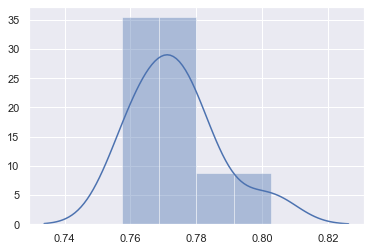

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score

result = []
for i in range(10):
    data_train_X, data_test_X, data_train_y, data_test_y = train_test_split(
    data_X, data_y, test_size=0.2 ,train_size = 0.8
)
    model_ad = make_pipeline(
        KNNImputer(),
        MinMaxScaler(),
        SelectKBest(k=56),
        RandomForestClassifier(n_estimators=100,max_depth = 7)
    )

    model_ad.fit(data_train_X , data_train_y)
    y_pred = model_ad.predict(data_test_X)
    print(f1_score(y_pred, data_test_y, average=None))
    result.append(sum(f1_score(y_pred, data_test_y, average=None))/2)
sns.distplot(result)

As you can see on chart above (it is f1 score) `RandomForestClassifier` is doing well. Now we will use `AdaBoostClassifier` with `RandomForestClassifier` as a base estimator. We are using these models becos they usualy perform well on inbalance datasets.

[0.8592233  0.86384977]
[0.83453237 0.83610451]
[0.82294264 0.8375286 ]
[0.8159204  0.83027523]
[0.84289277 0.85583524]
[0.81081081 0.78680203]
[0.82352941 0.81840194]
[0.82629108 0.82038835]
[0.83253589 0.83333333]
[0.83618582 0.84382284]


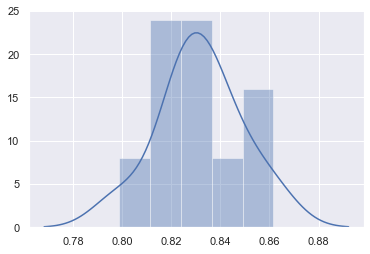

In [10]:
from sklearn.ensemble import AdaBoostClassifier
result = []
for i in range(10):
    data_train_X, data_test_X, data_train_y, data_test_y = train_test_split(
    data_X, data_y, test_size=0.1 ,train_size = 0.9
)
    model_ad = make_pipeline(
        KNNImputer(),
        MinMaxScaler(),
        SelectKBest(k=56),
        AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=100,max_depth = 7))
    )

    model_ad.fit(data_train_X , data_train_y)
    y_pred = model_ad.predict(data_test_X)
    result.append(sum(f1_score(y_pred, data_test_y, average=None))/2)
    print(f1_score(y_pred, data_test_y, average=None))
    
sns.distplot(result)

As you can see on chart above `AdaBoostClassifier` has on average 0.06 better f1 score then `RandomForestClassifier` witch is in my opinion big improvement over `RandomForestClassifier` becos there is so little error remaining every inprovement is valuable.

# Explenation of Ada boosting

`AdaBoostClassifier` is algorithm taking many weaker learners and making one strong learner out of them. It assigns weights to each learner depending on his accurasy if he is guessing  well then he gets possitive weight if he is guessing randomly then he gets 0 and if he is guessing badly he gets negative weight. Also this algorithm is trying to create learners in a way to conplement each other. Weight of each previously corectly classified sample decreases and weight of each incorectly classified sample increases so next estimators will be more likely to focus on samples previously classified incorectly and less likely to focus on samples previously classified corectly.

# Baseline

We split dataset to training data and testing data and we will create baseline witch we will compere to our models using `DummyClassifier`.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

data_train_X, data_test_X, data_train_y, data_test_y = train_test_split(data_X, data_y, test_size=0.2 ,train_size = 0.8)

clf = DummyClassifier(strategy='uniform')
clf.fit(data_train_X, data_train_y)
y_pred = clf.predict(data_test_X)
print(f1_score(y_pred, data_test_y, average=None))

clf = DummyClassifier(strategy='stratified')
clf.fit(data_train_X, data_train_y)
y_pred = clf.predict(data_test_X)
print(f1_score(y_pred, data_test_y, average=None))

clf = DummyClassifier(strategy='most_frequent')
clf.fit(data_train_X, data_train_y)
y_pred = clf.predict(data_test_X)
print(f1_score(y_pred, data_test_y, average=None))

[0.49642005 0.49521531]
[0.50361446 0.51184834]
[0.65757819 0.        ]


We can clearly see that our models perform much beter then dummy classifiers and have predictive power.

# Conclusion

I conclude that both our models perform well and better then dummy classifiers and I was positively surprised with performence of ada boosting at first I tried it with defaul estimators and it was disaster but when I switched the base estimator to random forest significant inprovment accured. I also think `RandomUnderSampler` really made the difference becos without it I wouldn't be able to train reasonable models. To finish this it is kind of obvius why ada booster was performing better then random forest it is becos it is using 50 of them with carefully chosen weights it is just so much more complex model.